# Primer ejemplo de entrenamiento de MNIST
Usando feed-foward fully-connected neural network

In [ ]:
# Importamos TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Cargamos el dataset MNIST
mnist = keras.datasets.mnist

In [ ]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Imprimimos la forma de los conjuntos de entrenamiento y prueba
print("Shape de las imágenes de entrenamiento:", train_images.shape)
print("Shape de las etiquetas de entrenamiento:", train_labels.shape)
print("Shape de las imágenes de prueba:", test_images.shape)
print("Shape de las etiquetas de prueba:", test_labels.shape)

Shape de las imágenes de entrenamiento: (60000, 28, 28)
Shape de las etiquetas de entrenamiento: (60000,)
Shape de las imágenes de prueba: (10000, 28, 28)
Shape de las etiquetas de prueba: (10000,)


In [ ]:
# Inspeccionamos el número de clases únicas en las etiquetas
print("Clases únicas en el dataset:", len(set(train_labels)))

Clases únicas en el dataset: 10


In [ ]:
# Normalizamos las imágenes para que sus valores estén en el rango de 0 a 1
train_images = train_images / 255.0
test_images = test_images / 255.0

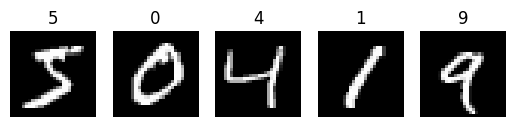

In [ ]:
# Observamos algunos ejemplos de datos
import matplotlib.pyplot as plt

# Configuramos el número de imágenes que queremos mostrar
num_images = 5

# Mostramos las primeras 'num_images' imágenes del conjunto de entrenamiento
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])

plt.show()

In [ ]:
# Reshaping and Normalizing the Images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# Importamos directamente Sequential, Dense y otras clases que podrías necesitar de keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Definimos el modelo
model = tf.keras.Sequential([
    # Primera capa oculta con 128 nodos y función de activación ReLU
    Dense(128, activation='relu', input_shape=(784,)),

    # Segunda capa oculta con 64 nodos y función de activación ReLU
    Dense(64, activation='relu'),

    # Capa de salida con 10 nodos y función de activación Softmax
    Dense(10, activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install pydot graphviz

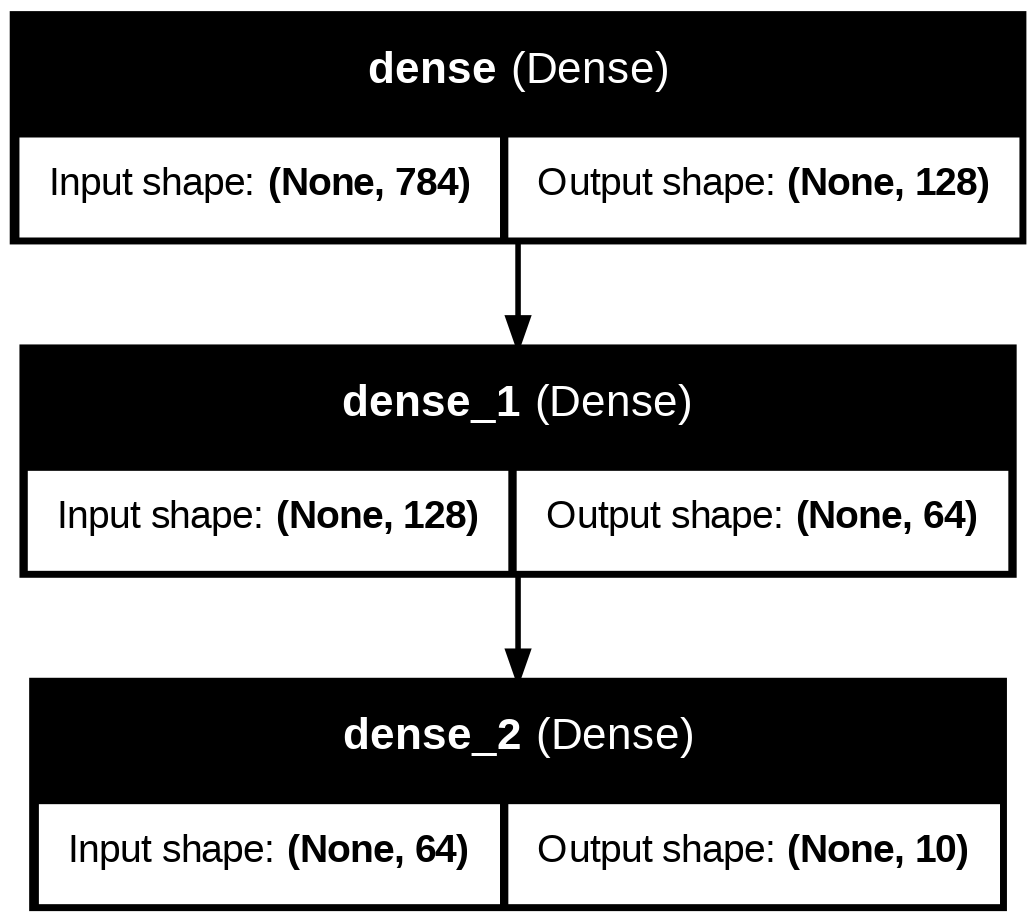

In [ ]:
from tensorflow.keras.utils import plot_model

# Asumiendo que 'model' es tu modelo de Keras ya definido
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
# Entrenamos el modelo
history = model.fit(train_images, train_labels,
                    epochs=300,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5734 - loss: 1.3526 - val_accuracy: 0.8829 - val_loss: 0.4288
Epoch 2/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8847 - loss: 0.3949 - val_accuracy: 0.9073 - val_loss: 0.3259
Epoch 3/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9041 - loss: 0.3246 - val_accuracy: 0.9179 - val_loss: 0.2837
Epoch 4/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9175 - loss: 0.2844 - val_accuracy: 0.9197 - val_loss: 0.2706
Epoch 5/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9250 - loss: 0.2588 - val_accuracy: 0.9317 - val_loss: 0.2361
Epoch 6/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9315 - loss: 0.2366 - val_accuracy: 0.9380 - val_loss: 0.2164
Epoch 7/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9376 - loss: 0.2122 - val_accuracy: 0.9405 - val_loss: 0.1991
Epoch 8/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9442 - loss: 0

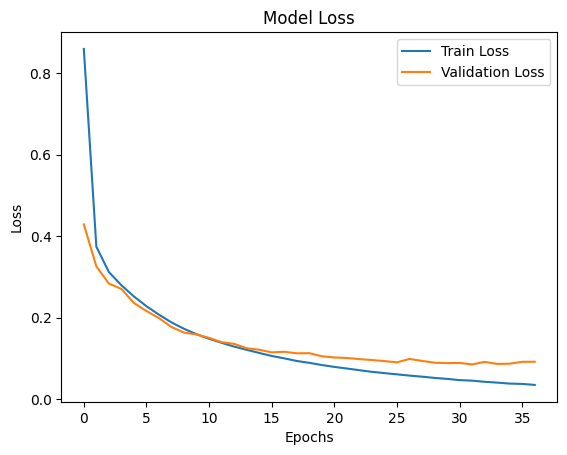

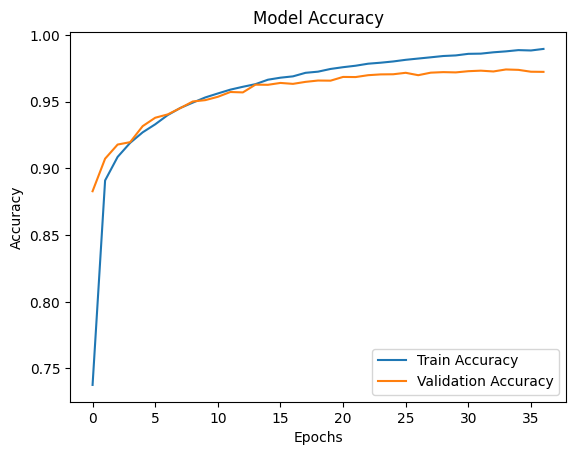

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Gráfico para accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np

# Predicciones del modelo
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, test_predictions_classes)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[ 968    0    1    1    1    2    3    0    2    2]
 [   0 1126    4    1    0    1    1    0    2    0]
 [   3    1 1010    5    2    0    3    5    3    0]
 [   0    0    3  995    0    2    0    4    1    5]
 [   0    0    4    0  949    1    6    3    0   19]
 [   2    2    1   19    2  854    6    0    3    3]
 [   5    3    4    1    4    5  935    0    1    0]
 [   0    7   11   12    0    0    0  986    0   12]
 [   4    1    6   19    4    3    2    4  923    8]
 [   1    5    0    9    8    4    1    2    1  978]]


In [ ]:
# Accuracy
accuracy = accuracy_score(test_labels, test_predictions_classes)
print("Accuracy:", accuracy)

# Precision, Recall y F1 Score para cada clase
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions_classes))

Accuracy: 0.9724

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.99      0.95      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
La salida de la red es [[2.0172203e-07 8.3607347e-06 2.2948077e-06 7.4577001e-05 2.2336695e-10
  2.7341564e-04 4.8158894e-05 2.0971450e-11 9.9957377e-01 1.9167504e-05]]


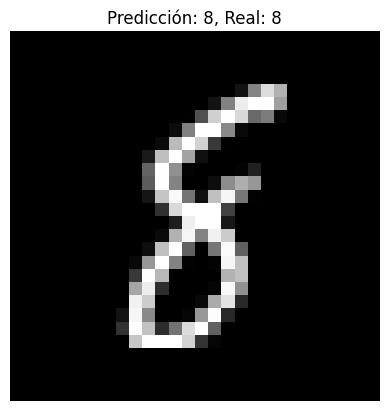

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionamos un índice aleatorio del conjunto de test
# Puedes cambiar este índice para probar diferentes imágenes
indice = np.random.randint(0, len(test_images))

# Hacemos una predicción para la imagen seleccionada
imagen = test_images[indice]
prediccion = model.predict(np.array([imagen]))
print(f'La salida de la red es {prediccion}')
clase_predicha = np.argmax(prediccion)

# Obtenemos la etiqueta real
etiqueta_real = test_labels[indice]

# Mostramos la imagen junto con las etiquetas predicha y real
plt.imshow(imagen.reshape(28, 28), cmap='gray')
plt.title(f"Predicción: {clase_predicha}, Real: {etiqueta_real}")
plt.axis('off')
plt.show()
